#### CMSE 202 Final Project
### &#9989; Griffin Frendo, Ian Byram, Ty Buckley, Yoel Garcia 
### &#9989; Section 002
#### &#9989; 4/26/21

# Background/Motivation

The legalization and decriminalization of  drugs is a very tense and debated topic in today's society. Such a law passed will have major impacts for society, some very good, some bad. Through this project we want to explore some impacts that have already occurred on countries, states and communities across the world.  


The original topic question: How legalization of drug decreases crime.

We want to expanded on this topic. The reason we expanded the topic is because there are not many great datasets for the time periods that we need in terms of crime rate. Also, the legalization/decriminalization of drugs has a much broader impact than just crime therefore to get a larger understanding of its impact we wanted to look at other metrics as well.

**Overall new question**: How does the legalization/decriminalization impact society in terms of crime, overdoses and HIV rates?


# Data Used







State of California Department of Justice - Includes the years (2010-2019) with the type of crime committed and a count of how many times it was committed.

Country Homicides- Includes number of homicides from each year starting in 1990 going to 2018. 


# Methodology

### Cleaning Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.api as sm


In [2]:
cali_crime_00_09 = pd.read_csv("State of California Department of Justice 00-09 - OpenJustice.csv")
cali_crime_10_19 = pd.read_csv("State of California Department of Justice 10-19 - OpenJustice.csv")

cali_crime_00_19 = cali_crime_00_09.join(cali_crime_10_19,lsuffix="Type of Crime")
cali_crime_00_19.rename(columns={cali_crime_00_19.columns[0]:"Type of Crime"},inplace=True)
cali_crime_00_19.drop(columns=cali_crime_00_19.columns[11],inplace=True)
cali_crime_00_19.head() #First Five rows

,Type of Crime,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Crimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Violent Crimes,"210,492","210,510","207,988","204,591","197,432","189,593","194,128","191,493","185,233",...,"163,957","155,313","160,629","151,634","151,425","166,588","174,701","178,553","176,866","173,205"
2,Homicide,"2,074","2,201","2,392","2,402","2,394","2,503","2,483","2,258","2,143",...,"1,809","1,794","1,878","1,745","1,697","1,861","1,930","1,829","1,739","1,679"
3,Rape (Forcible Rape prior to 2014),"9,785","9,882","10,176","9,918","9,598","9,345","9,213","9,047","8,906",...,"8,325","7,678","7,828","7,459","9,397","12,793","13,695","14,724","15,500","14,720"
4,Rape,"8,197","8,219","8,620","8,461","8,287","8,115","7,937","7,931","7,859",...,"7,408","6,792","6,935","6,665","8,562","11,827","12,785","13,799","14,526","13,791"


In [3]:
cali_crime_00_19.drop(0,inplace=True)
cali_crime_00_19.reset_index(drop=True, inplace=True)
cali_crime_00_19.head()

,Type of Crime,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Violent Crimes,"210,492","210,510","207,988","204,591","197,432","189,593","194,128","191,493","185,233",...,"163,957","155,313","160,629","151,634","151,425","166,588","174,701","178,553","176,866","173,205"
1,Homicide,"2,074","2,201","2,392","2,402","2,394","2,503","2,483","2,258","2,143",...,"1,809","1,794","1,878","1,745","1,697","1,861","1,930","1,829","1,739","1,679"
2,Rape (Forcible Rape prior to 2014),"9,785","9,882","10,176","9,918","9,598","9,345","9,213","9,047","8,906",...,"8,325","7,678","7,828","7,459","9,397","12,793","13,695","14,724","15,500","14,720"
3,Rape,"8,197","8,219","8,620","8,461","8,287","8,115","7,937","7,931","7,859",...,"7,408","6,792","6,935","6,665","8,562","11,827","12,785","13,799","14,526","13,791"
4,Attempted Rape,"1,588","1,663","1,556","1,457","1,311","1,230","1,276","1,116","1,047",...,917,886,893,794,835,966,910,925,974,929


In [4]:
cali_crime_00_19 = cali_crime_00_19.iloc[[0,25]]
cali_crime_00_19.reset_index(drop=True, inplace=True)
cali_crime_00_19.head(5)

,Type of Crime,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Violent Crimes,"210,492","210,510","207,988","204,591","197,432","189,593","194,128","191,493","185,233",...,"163,957","155,313","160,629","151,634","151,425","166,588","174,701","178,553","176,866","173,205"
1,Property Crimes,"1,054,860","1,120,487","1,171,644","1,209,030","1,223,275","1,195,381","1,156,010","1,112,366","1,081,272",...,"981,523","974,666","1,048,764","1,018,333","946,682","1,023,828","1,001,380","986,769","940,998","915,197"


In [5]:
cali_crime_00_19.dtypes

Type of Crime    object
2000             object
2001             object
2002             object
2003             object
2004             object
2005             object
2006             object
2007             object
2008             object
2009             object
2010             object
2011             object
2012             object
2013             object
2014             object
2015             object
2016             object
2017             object
2018             object
2019             object
dtype: object

In [6]:
cali_crime_00_19.replace(",", '', regex=True, inplace=True)

In [7]:
intconvert = {"2000":int,
              "2001":int,
              "2002":int,
              "2003":int,
              "2004":int,
              "2005":int,
              "2006":int,
              "2007":int,
              "2008":int,
              "2009":int,
              "2010":int,
              "2011": int,
              "2012": int,
              "2013": int,
              "2014":int,
              "2015":int,
              "2016":int,
              "2017":int,
              "2018":int,
              "2019":int}

In [8]:
cali_crime_00_19 = cali_crime_00_19.astype(intconvert)

In [9]:
cali_crime_00_19.dtypes

Type of Crime    object
2000              int64
2001              int64
2002              int64
2003              int64
2004              int64
2005              int64
2006              int64
2007              int64
2008              int64
2009              int64
2010              int64
2011              int64
2012              int64
2013              int64
2014              int64
2015              int64
2016              int64
2017              int64
2018              int64
2019              int64
dtype: object

### Type of Crime

In [10]:
cali_crime_pre_2016 = cali_crime_00_19[[ 'Type of Crime',"2000","2001","2002","2003","2004","2005","2006","2007","2008",
                                         "2009","2010","2011", "2012", "2013", "2014", "2015", "2016"]]

cali_crime_pre_2016 #Leagalization occured in 2016, after election results were certified

,Type of Crime,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Violent Crimes,210492,210510,207988,204591,197432,189593,194128,191493,185233,174579,163957,155313,160629,151634,151425,166588,174701
1,Property Crimes,1054860,1120487,1171644,1209030,1223275,1195381,1156010,1112366,1081272,1006788,981523,974666,1048764,1018333,946682,1023828,1001380


In [11]:
cali_crime_post_2016 = cali_crime_00_19[[ "Type of Crime","2017", "2018", "2019"]]

cali_crime_post_2016

,Type of Crime,2017,2018,2019
0,Violent Crimes,178553,176866,173205
1,Property Crimes,986769,940998,915197


In [12]:
cali_crime_pre_2016["mean"] = cali_crime_pre_2016.mean(axis=1)
cali_crime_pre_2016

,Type of Crime,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,mean
0,Violent Crimes,210492,210510,207988,204591,197432,189593,194128,191493,185233,174579,163957,155313,160629,151634,151425,166588,174701,1.817815e+05
1,Property Crimes,1054860,1120487,1171644,1209030,1223275,1195381,1156010,1112366,1081272,1006788,981523,974666,1048764,1018333,946682,1023828,1001380,1.078017e+06


In [13]:
cali_crime_post_2016["mean"] = cali_crime_post_2016.mean(axis=1)
cali_crime_post_2016

,Type of Crime,2017,2018,2019,mean
0,Violent Crimes,178553,176866,173205,176208.000000
1,Property Crimes,986769,940998,915197,947654.666667


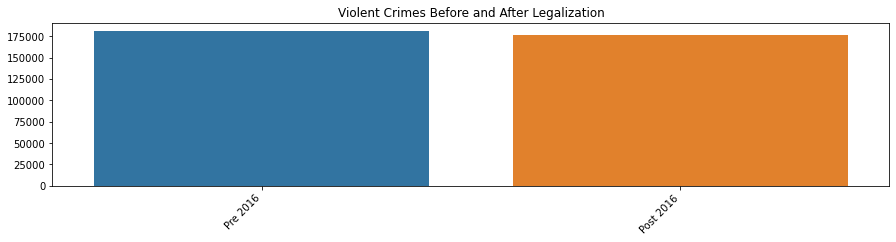

In [14]:
plt.figure(figsize=(15,3))
ax = sns.barplot(["Pre 2016", "Post 2016"], [cali_crime_pre_2016["mean"][0],cali_crime_post_2016["mean"][0]])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Violent Crimes Before and After Legalization")
plt.show()

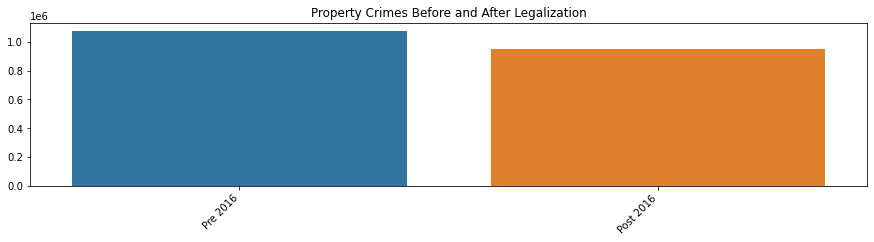

In [15]:
plt.figure(figsize=(15,3))
ax = sns.barplot(["Pre 2016", "Post 2016"], [cali_crime_pre_2016["mean"][1],cali_crime_post_2016["mean"][1]])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Property Crimes Before and After Legalization")
plt.show()

## Crime By Year

In [16]:
cali_crime_00_19_by_year = cali_crime_00_19.transpose()

In [17]:
cali_crime_00_19_by_year.drop("Type of Crime", inplace=True)

cali_crime_00_19_by_year = cali_crime_00_19_by_year.astype('int')

cali_crime_00_19_by_year.reset_index(inplace=True)

cali_crime_00_19_by_year.head()

,index,0,1
0,2000,210492,1054860
1,2001,210510,1120487
2,2002,207988,1171644
3,2003,204591,1209030
4,2004,197432,1223275


In [18]:
cali_crime_00_19_by_year.columns = ["Year", "Violent Crimes", "Property Crimes"]
cali_crime_00_19_by_year.head()

,Year,Violent Crimes,Property Crimes
0,2000,210492,1054860
1,2001,210510,1120487
2,2002,207988,1171644
3,2003,204591,1209030
4,2004,197432,1223275


In [19]:
cali_crime_00_19_by_year["total"] = cali_crime_00_19_by_year.iloc[:,1:].sum(axis=1)
cali_crime_00_19_by_year.head()

,Year,Violent Crimes,Property Crimes,total
0,2000,210492,1054860,1265352
1,2001,210510,1120487,1330997
2,2002,207988,1171644,1379632
3,2003,204591,1209030,1413621
4,2004,197432,1223275,1420707


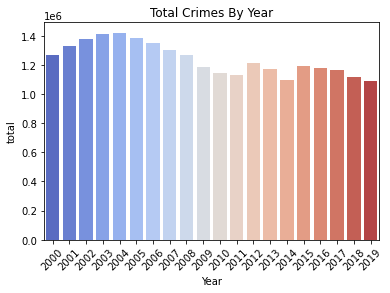

In [20]:
sns.barplot(x = cali_crime_00_19_by_year["Year"], y = cali_crime_00_19_by_year["total"], palette="coolwarm")
plt.title("Total Crimes By Year")
plt.xticks(rotation=45)
plt.show()

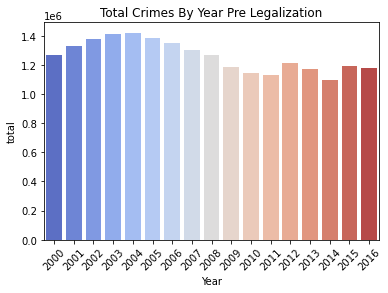

In [21]:
sns.barplot(x = cali_crime_00_19_by_year[:17]["Year"], y = cali_crime_00_19_by_year[:17]["total"], palette="coolwarm")
plt.title("Total Crimes By Year Pre Legalization")
plt.xticks(rotation=45)
plt.show()

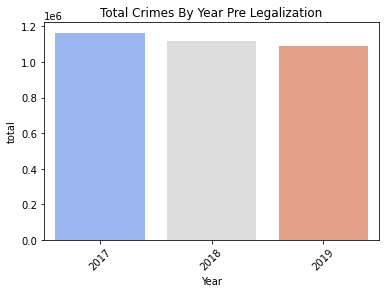

In [22]:
sns.barplot(x = cali_crime_00_19_by_year[17:]["Year"], y = cali_crime_00_19_by_year[17:]["total"], palette="coolwarm")
plt.title("Total Crimes By Year Pre Legalization")
plt.xticks(rotation=45)
plt.show()

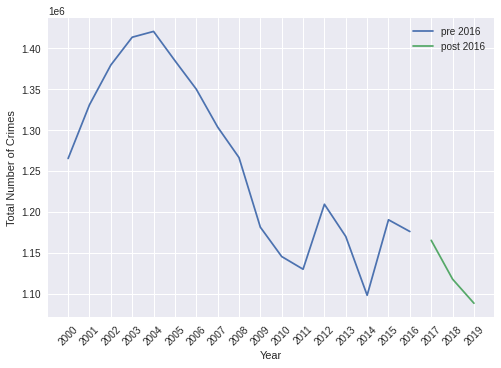

In [23]:
plt.style.use('seaborn')
plt.plot(cali_crime_00_19_by_year[:17]["Year"],cali_crime_00_19_by_year[:17]["total"], label = "pre 2016")
plt.plot(cali_crime_00_19_by_year[17:]["Year"],cali_crime_00_19_by_year[17:]["total"], label = "post 2016")
plt.ylabel("Total Number of Crimes")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.legend()

In [24]:
cali_income = pd.read_csv("california_income.csv",names=["Date","Median Income"],header=1)
cali_income_00_19 = cali_income[15:]
cali_income_00_19.reset_index(drop=True,inplace=True)
cali_income_00_19.head()

,Date,Median Income
0,2000-01-01,46816
1,2001-01-01,47262
2,2002-01-01,47437
3,2003-01-01,49300
4,2004-01-01,49222


In [25]:
cali_population = pd.read_csv("california-population.csv",header=9)
cali_population_00_19 = cali_population[100:120]
cali_population_00_19.reset_index(drop=True,inplace=True)
cali_population_00_19.head()

,date,Population,Annual Change
0,2000-12-01,33987977,2.54
1,2001-12-01,34479458,1.45
2,2002-12-01,34871843,1.14
3,2003-12-01,35253159,1.09
4,2004-12-01,35574576,0.91


In [26]:
cali_unemployment = pd.read_csv("California_Unemployment_Statistics.csv")

cali_unemployment_mask = cali_unemployment["Area Name"] == "California"
cali_unemployment = cali_unemployment[cali_unemployment_mask]

cali_unemployment.reset_index(drop=True,inplace=True)
cali_unemployment_00_19 = cali_unemployment[10:]
cali_unemployment_00_19.reset_index(drop=True,inplace=True)

cali_unemployment_00_19.head()

,Area Type,Area Name,Year,Period,Labor Force,Employment,Unemployment,Unemployment Rate,Seasonally Adjusted (Y N),Status
0,State,California,2000,Annual,16867800,16033200,834600,4.9,N,Final
1,State,California,2001,Annual,17128400,16197700,930800,5.4,N,Final
2,State,California,2002,Annual,17257100,16108700,1148400,6.7,N,Final
3,State,California,2003,Annual,17277600,16102800,1174800,6.8,N,Final
4,State,California,2004,Annual,17383600,16304000,1079600,6.2,N,Final


In [27]:
marriage_rates = pd.read_csv("state-marriage-rates-90-95-99-19.csv",header=5)
marriage_rates.drop(columns=["Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27","Unnamed: 28","Unnamed: 29"],inplace=True)
marriage_rates.drop(index=0,inplace=True)
marriage_rates.rename(columns={"Unnamed: 0" : "State"},inplace=True)

cali_marriage_rates = marriage_rates.iloc[4]
cali_marriage_rates.drop(index="State",inplace=True)

cali_marriage_rates = cali_marriage_rates.astype('float64')
cali_marriage_rates = cali_marriage_rates[["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]]
cali_marriage_rates.index = np.arange(20)

cali_marriage_rates.head()

0    5.8
1    6.5
2    6.2
3    6.1
4    6.4
Name: 5, dtype: float64

In [28]:
cali_age_data = pd.read_csv("california_child_population.csv")
cali_age_data["Data"].replace(',','',regex=True,inplace=True)
cali_age_data["Data"] = cali_age_data["Data"].astype('float64')

cali_age_data["Percentage of Total Population"] = cali_age_data["Data"] / cali_population_00_19[" Population"]
cali_age_data.head()

,FIPSCode,LocationType,Location,AgeGroup,Gender,TimeFrame,DataFormat,Data,Percentage of Total Population
0,6,State,California,Total for Ages 0_17,Total,2000,Number,9226715.0,0.271470
1,6,State,California,Total for Ages 0_17,Total,2001,Number,9351040.0,0.271206
2,6,State,California,Total for Ages 0_17,Total,2002,Number,9439641.0,0.270695
3,6,State,California,Total for Ages 0_17,Total,2003,Number,9522125.0,0.270107
4,6,State,California,Total for Ages 0_17,Total,2004,Number,9559942.0,0.268730


In [29]:
cali_pop_density = pd.read_csv("California - Population density.csv")
cali_pop_density_by_year = cali_pop_density.transpose()
cali_pop_density_by_year.reset_index(inplace=True)
cali_pop_density_by_year.drop(index=np.arange(6), inplace=True)
cali_pop_density_by_year.columns = ["Year", "Population Density"]
cali_pop_density_00_19 = cali_pop_density_by_year[5:]
cali_pop_density_00_19.reset_index(drop=True,inplace=True)
cali_pop_density_00_19["Population Density"] = cali_pop_density_00_19["Population Density"].astype('float64')
cali_pop_density_00_19.head()

,Year,Population Density
0,2000,84.14
1,2001,85.36
2,2002,86.33
3,2003,87.27
4,2004,88.07


In [30]:
cali_poverty_rates = pd.read_csv("California - Estimated Percent of People of All Ages in Poverty, NSA.csv")
cali_poverty_rates_by_year = cali_poverty_rates.transpose()
cali_poverty_rates_by_year.reset_index(inplace=True)
cali_poverty_rates_by_year.drop(index=np.arange(3), inplace=True)
cali_poverty_rates_by_year.columns = ["Year", "Poverty Rate"]
cali_poverty_rates_00_19 = cali_poverty_rates_by_year[7:]
cali_poverty_rates_00_19.reset_index(drop=True, inplace=True)
cali_poverty_rates_00_19["Poverty Rate"] = cali_poverty_rates_00_19["Poverty Rate"].astype('float64')
cali_poverty_rates_00_19.head()

,Year,Poverty Rate
0,2000,12.7
1,2001,12.9
2,2002,13.3
3,2003,13.7
4,2004,13.2


In [31]:
explanatory_vars = pd.DataFrame({"Income": cali_income_00_19[:17]["Median Income"],
                                 "Unemployment": cali_unemployment_00_19[:17]["Unemployment Rate"],
                                 "Marriage Rate": cali_marriage_rates[:17],
                                 "Youth Concentration": cali_age_data[:17]["Percentage of Total Population"],
                                 "Population": cali_population_00_19[:17][" Population"],
                                 "Population Change": cali_population_00_19[:17][" Annual Change"],
                                 "Population Density": cali_pop_density_00_19[:17]["Population Density"],
                                 "Poverty Rate": cali_poverty_rates_00_19[:17]["Poverty Rate"]})

explanatory_vars.head()

,Income,Unemployment,Marriage Rate,Youth Concentration,Population,Population Change,Population Density,Poverty Rate
0,46816,4.9,5.8,0.271470,33987977,2.54,84.14,12.7
1,47262,5.4,6.5,0.271206,34479458,1.45,85.36,12.9
2,47437,6.7,6.2,0.270695,34871843,1.14,86.33,13.3
3,49300,6.8,6.1,0.270107,35253159,1.09,87.27,13.7
4,49222,6.2,6.4,0.268730,35574576,0.91,88.07,13.2


In [32]:
predicting_vars = pd.DataFrame({"Income": cali_income_00_19[17:]["Median Income"],
                                "Unemployment": cali_unemployment_00_19[17:]["Unemployment Rate"],
                                "Marriage Rate": cali_marriage_rates[17:],
                                "Youth Concentration": cali_age_data[17:]["Percentage of Total Population"],
                                "Population": cali_population_00_19[17:][" Population"],
                                "Population Change": cali_population_00_19[17:][" Annual Change"],
                                "Population Density": cali_pop_density_00_19[17:]["Population Density"],
                                "Poverty Rate": cali_poverty_rates_00_19[17:]["Poverty Rate"]})

predicting_vars.head()

,Income,Unemployment,Marriage Rate,Youth Concentration,Population,Population Change,Population Density,Poverty Rate
17,70038,4.8,6.3,0.232614,39337785,0.48,97.44,13.3
18,70489,4.3,6.0,0.231106,39437463,0.25,97.69,12.8
19,78105,4.0,5.7,0.229772,39437610,0.00,97.82,11.8


In [33]:
property_model = sm.OLS(cali_crime_00_19_by_year[:17]["Property Crimes"],explanatory_vars)
property_results = property_model.fit()

print(property_results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Property Crimes   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              1795.
Date:                Sat, 17 Apr 2021   Prob (F-statistic):                    1.72e-13
Time:                        21:14:52   Log-Likelihood:                         -197.63
No. Observations:                  17   AIC:                                      411.3
Df Residuals:                       9   BIC:                                      417.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [34]:
new_property_model = sm.OLS(cali_crime_00_19_by_year[:17]["Property Crimes"],
                            explanatory_vars[["Unemployment","Youth Concentration","Population Change"]])

new_property_results = new_property_model.fit()

print(new_property_results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Property Crimes   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              4537.
Date:                Sat, 17 Apr 2021   Prob (F-statistic):                    3.80e-21
Time:                        21:14:52   Log-Likelihood:                         -201.83
No. Observations:                  17   AIC:                                      409.7
Df Residuals:                      14   BIC:                                      412.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [35]:
predicted_property = new_property_results.predict(predicting_vars[["Unemployment","Youth Concentration","Population Change"]])

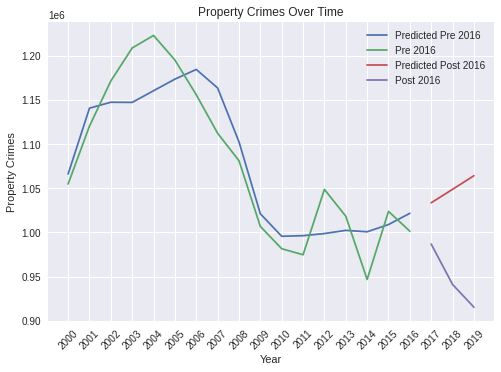

In [36]:
plt.plot(cali_crime_00_19_by_year[:17]['Year'],new_property_results.predict(),label="Predicted Pre 2016")
plt.plot(cali_crime_00_19_by_year[:17]['Year'],cali_crime_00_19_by_year[:17]['Property Crimes'],label="Pre 2016")
plt.plot(cali_crime_00_19_by_year[17:]['Year'],predicted_property,label="Predicted Post 2016")
plt.plot(cali_crime_00_19_by_year[17:]['Year'],cali_crime_00_19_by_year[17:]['Property Crimes'],label="Post 2016")
plt.title("Property Crimes Over Time")
plt.xlabel("Year")
plt.ylabel("Property Crimes")
plt.xticks(rotation=45)
plt.legend()

In [37]:
violent_model = sm.OLS(cali_crime_00_19_by_year[:17]["Violent Crimes"],explanatory_vars)
violent_results = violent_model.fit()

print(violent_results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Violent Crimes   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              5025.
Date:                Sat, 17 Apr 2021   Prob (F-statistic):                    1.68e-15
Time:                        21:14:52   Log-Likelihood:                         -158.67
No. Observations:                  17   AIC:                                      333.3
Df Residuals:                       9   BIC:                                      340.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [38]:
new_violent_model = sm.OLS(cali_crime_00_19_by_year[:17]["Violent Crimes"],
                           explanatory_vars[["Unemployment","Poverty Rate","Youth Concentration"]])

new_violent_results = new_violent_model.fit()

print(new_violent_results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Violent Crimes   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              4655.
Date:                Sat, 17 Apr 2021   Prob (F-statistic):                    3.17e-21
Time:                        21:14:52   Log-Likelihood:                         -171.40
No. Observations:                  17   AIC:                                      348.8
Df Residuals:                      14   BIC:                                      351.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [39]:
predicted_violent = new_violent_results.predict(predicting_vars[["Unemployment","Poverty Rate","Youth Concentration"]])

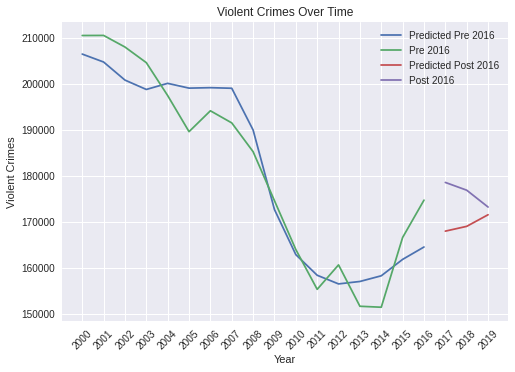

In [40]:
plt.plot(cali_crime_00_19_by_year[:17]['Year'],new_violent_results.predict(),label="Predicted Pre 2016")
plt.plot(cali_crime_00_19_by_year[:17]['Year'],cali_crime_00_19_by_year[:17]['Violent Crimes'],label="Pre 2016")
plt.plot(cali_crime_00_19_by_year[17:]['Year'],predicted_violent,label="Predicted Post 2016")
plt.plot(cali_crime_00_19_by_year[17:]['Year'],cali_crime_00_19_by_year[17:]['Violent Crimes'],label="Post 2016")
plt.title("Violent Crimes Over Time")
plt.xlabel("Year")
plt.ylabel("Violent Crimes")
plt.xticks(rotation=45)
plt.legend()

### Countries Dataset

In [41]:
countries = pd.read_csv('CountriesHomicides.csv',header=4)
countries = countries.drop(columns = [str(i) for i in range(1960,1990)])
countries = countries.drop(columns = ["2019","2020"])
countries = countries.drop(columns = ["Country Code","Indicator Name"])
countries = countries.dropna().iloc[:-1,:]
countries

,Country Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
8,Armenia,VC.IHR.PSRC.P5,5.030858,5.306328,8.859017,7.968812,4.781244,3.605453,3.598243,3.191746,...,3.358616,1.946260,2.468247,2.253627,2.174218,2.472185,2.563613,2.963067,2.377080,1.693916
11,Australia,VC.IHR.PSRC.P5,2.205111,1.977982,1.729668,1.891700,1.797902,1.978538,1.946202,1.979637,...,1.209148,1.042669,1.100364,1.060952,1.053541,1.029817,0.986107,0.935592,0.825720,0.891632
12,Austria,VC.IHR.PSRC.P5,1.152260,1.325151,1.238677,1.013673,1.107306,0.976206,1.234745,0.821624,...,0.609126,0.689660,0.887206,0.929168,0.724622,0.522332,0.530035,0.651629,0.793660,0.967229
19,Bulgaria,VC.IHR.PSRC.P5,2.567448,4.277404,5.324802,5.713591,5.805432,5.895477,5.282219,4.846682,...,2.007089,1.993263,1.734734,1.922551,1.495180,1.573358,1.750063,1.104594,1.450203,1.304667
23,Belarus,VC.IHR.PSRC.P5,5.004367,4.576418,5.849717,7.459202,8.201197,9.526072,9.656686,10.200419,...,5.162640,4.256640,3.961630,3.610474,3.533718,3.604848,3.453601,3.250177,2.539620,2.390873
27,Brazil,VC.IHR.PSRC.P5,19.664802,18.561716,16.833232,17.859684,18.723517,20.985134,21.670465,22.219412,...,22.960855,22.109854,24.344537,26.621868,26.941954,28.849832,28.590256,29.877807,30.831363,27.382530
33,Canada,VC.IHR.PSRC.P5,2.385506,2.703593,2.597043,2.192801,2.065090,2.012745,2.152230,1.970253,...,1.807617,1.628227,1.754530,1.569210,1.442068,1.463647,1.693190,1.682107,1.796794,1.755921
35,Switzerland,VC.IHR.PSRC.P5,1.653421,1.458590,1.369075,1.528621,1.153002,1.172179,1.179308,1.230812,...,0.661144,0.665926,0.581764,0.561938,0.702933,0.499634,0.687014,0.536998,0.532179,0.586468
43,Colombia,VC.IHR.PSRC.P5,73.498827,84.198483,81.876518,81.048644,75.726437,61.285334,62.978089,61.499632,...,35.345209,34.184160,35.317630,35.680397,33.162355,28.408882,26.897771,25.743617,25.019503,25.343803
46,Costa Rica,VC.IHR.PSRC.P5,4.455934,4.122317,4.868364,4.744539,5.261896,5.189642,5.203227,5.646752,...,11.613146,11.513159,10.230762,8.681735,8.667026,9.947053,11.489736,11.797517,12.181929,11.261254


In [42]:
decriminalized = {'Armenia':2009,'Germany':2000,'Estonia':2002,'Croatia':2013,'Jamaica':2015,'Mexico':2009,'Poland':2017,'Portugal':2001,'Russian Federation':2004,'Switzerland':2012}
already_decriminalized = ['Colombia','Italy','Netherlands','Spain']

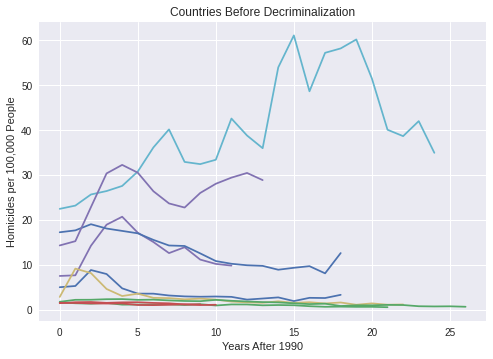

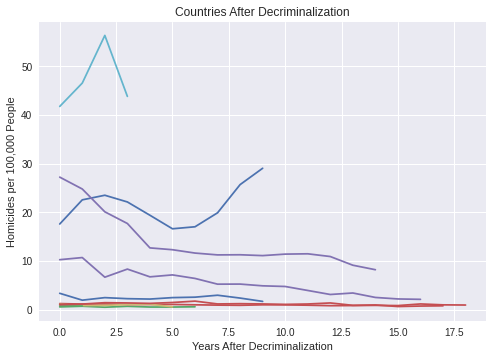

In [43]:
before= {}
after = {}
for row in countries.values:
    country = row[0]
    if country in decriminalized:
        year = 1988
        before[country] = row[1990-year:decriminalized[country]-year]
        after[country] = row[decriminalized[country]-year:2019-year]
for k,v in before.items():
    plt.plot(v)
plt.title("Countries Before Decriminalization")
plt.xlabel('Years After 1990')
plt.ylabel('Homicides per 100,000 People')
plt.show()
for k,v in after.items():
    plt.plot(v)
plt.xlabel('Years After Decriminalization')
plt.title("Countries After Decriminalization")
plt.ylabel('Homicides per 100,000 People')
plt.show()

In [44]:
import statsmodels.api as sm
before_slopes = []
for country,y in before.items():
    X = [i for i in range(len(y))]
    model = sm.OLS(y,X)
    result = model.fit()
    before_slopes.append(result.params[0])
after_slopes = []
for country,y in after.items():
    X = [i for i in range(len(y))]
    model = sm.OLS(y,X)
    result = model.fit()
    after_slopes.append(result.params[0])
print('Average yearly increase in homicides per 100,000 people before decriminalizing drugs:',sum(before_slopes)/len(before_slopes))
print('Average yearly increase in homicides per 100,000 people after decriminalizing drugs:',sum(after_slopes)/len(after_slopes))
print('Median yearly increase in homicides per 100,000 people before decriminalizing drugs:',np.median(before_slopes))
print('Median yearly increase in homicides per 100,000 people after decriminalizing drugs:',np.median(after_slopes))

Average yearly increase in homicides per 100,000 people before decriminalizing drugs: 0.932385771149465
Average yearly increase in homicides per 100,000 people after decriminalizing drugs: 2.746757125877214
Median yearly increase in homicides per 100,000 people before decriminalizing drugs: 0.2360799882357042
Median yearly increase in homicides per 100,000 people after decriminalizing drugs: 0.36744358305301855


# Results

# Discussion

# Conclusion

# References